# Experiment 1_Lecture

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. What is Probability Theory?

* Probability Theory is a **mathematical** framework for computing the probability of complex events.

* Under the assumption that **we know the probabilities of the basic events.**

* What is the precise meaning of <font color='red'>"probability"</font> and <font color='red'>"event"</font>?

* We will give precise definitions later in the class. 

* For now, we'll rely on common sense.

### 1.1 A simple (?) question
We all know that if one flips a fair coin then the outcome is "heads" or "tails" with equal probabilities.

What does that mean? 

It means that if we flip the coin $k$ times, for some large value of $k$, say $k=10,000$, 

Then the number of "heads" is **about** $\frac{k}{2}=\frac{10,000}{2} = 5,000$

What do we mean by **about** ??

### 1.2 Simulating coin flips

We will use the pseudo random number generators in `numpy` to simulate the coin flips. 

instead of "Heads" and "Tails" we will use $x_i=1$ or $x_i=-1$ and consider the sum $S_{10000} = x_1+x_2+\cdots+x_{10000}$.

If the number of heads is about 5,000 then $S_{10000}\approx 0$

We will vary the number of coin flips, which we denote by $k$

In [2]:
# Generate the sum of k coin flips, repeat that n times
def generate_counts(k=1000,n=100):
    X=2*(random.rand(k,n)>0.5)-1  # generate a kXn matrix of +-1 random numbers
    S=sum(X,axis=0) 
    return S 

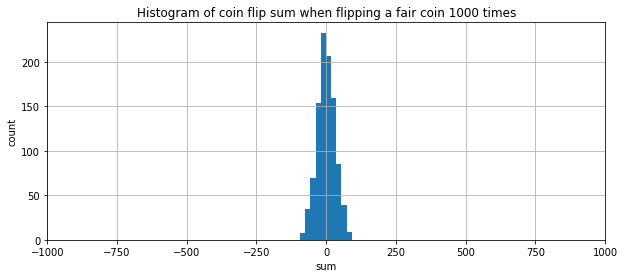

In [4]:
k=1000
n=1000
counts=generate_counts(k=k,n=n)
figure(figsize=[10,4])
hist(counts);
xlim([-k,k])
xlabel("sum")
ylabel("count")
title("Histogram of coin flip sum when flipping a fair coin %d times"%k)
grid()

# Note that the sum $S_{1000}$ is not **exactly** $0$, it is only **close to** $0$.

Using **probability theory** we can calculate **how small** is $\big|S_k\big|$

In a later lesson we will show that the probability that 
$$\big| S_k \big| \geq 4\sqrt{k}$$
is smaller than $2 \times 10^{-8}$ which is $0.000002\%$

Let's use our simulation to demonstrate that this is the case:

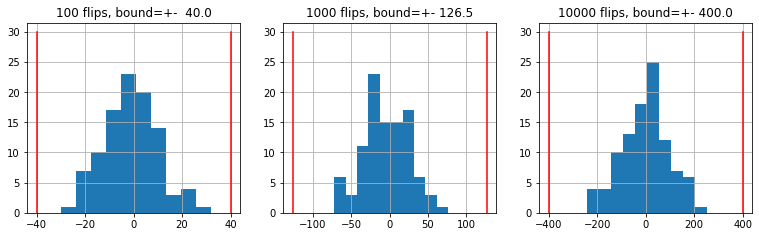

In [4]:
from math import sqrt
figure(figsize=[13,3.5])
for j in range(2,5):
    k=10**j
    counts=generate_counts(k=k,n=100)
    subplot(130+j-1)
    hist(counts,bins=10);
    d=4*sqrt(k)
    plot([-d,-d],[0,30],'r')
    plot([+d,+d],[0,30],'r')
    grid()
    title('%d flips, bound=+-%6.1f'%(k,d))


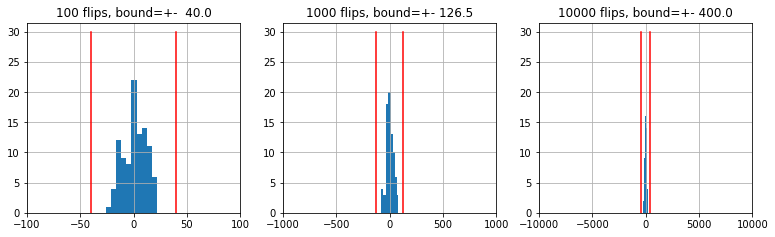

In [5]:
figure(figsize=[13,3.5])
for j in range(2,5):
    k=10**j
    counts=generate_counts(k=k,n=100)
    subplot(130+j-1)
    hist(counts,bins=10);
    xlim([-k,k])
    d=4*sqrt(k)
    plot([-d,-d],[0,30],'r')
    plot([+d,+d],[0,30],'r')
    grid()
    title('%d flips, bound=+-%6.1f'%(k,d))


### 1.3 Summary
We did some experiments summing $k$ random numbers: $S_k=x_1+x_2+\cdots+x_k$

$x_i=-1$ with probability $1/2$, $x_i=+1$ with probability $1/2$

Our experiments show that the sum $S_k$ is (almost) always in the range $\big[-4\sqrt{k},+4\sqrt{k}\big]$ 


$$\mbox{ If } k \to \infty,\;\;\; \frac{4 \sqrt{k}}{k} = \frac{4}{\sqrt{k}} \to 0$$

$$ \mbox{Therefore if }\;\;k \to \infty,  \frac{S_k}{k} \to 0$$

## 2. Sets in Python
* Python has a data type called `set` 
* close to, but not the same as, mathematical sets.
* A set is initialized using a list, or a tuple, containing elements.

In [6]:
# A set of numbers
set([1,2,30])

{1, 2, 30}

In [7]:
# order is not presenrved
# When printing out a set, the elements will be listed 
# A set of strings
set(['this','that','the other'])

{'that', 'the other', 'this'}

In [8]:
# each element can appear in a set only once.
set([1,2,3,2])

{1, 2, 3}

more commands creating and editing sets

In [9]:
# Create an empty set
A = set()

In [10]:
# Add elements from a set
A = set()
A.update({0, 10})
print(A)

{0, 10}


In [11]:
# Delete an element from a set
A = {1, 2, 3}
A.remove(2)       # Works only if the element to be deleted is present in the set
A.discard(4)      # Works even if the element to be deleted is not present in the set
A.discard(3)      
print(A)

{1}


In [12]:
# Remove a random element from a set
A = {1, 2, 3}
A.pop()
print(A)

{2, 3}


In [13]:
A = {-1,2,1, 3}
A.pop()
print(A)

{2, 3, -1}


In [14]:
# Get a sorted list from a set
A = {1, 10, 4, -9, 7, 8, -6, 3, 2}
print(sorted(A))

[-9, -6, 1, 2, 3, 4, 7, 8, 10]


### 2.1 Elements of sets must be immutable
While in mathematics anything can be an element of a set, in Python an element has to be
**immutable** and **hashable** i.e. an object with a fixed value. Immutable objects include numbers, strings and tuples. 

In [15]:
#elements can be tuples
set([(1,2),(1,3),(3,1)])

{(1, 2), (1, 3), (3, 1)}

In [16]:
# but cannot be lists
set([[1,2],[1,3],[3,1]])

TypeError: unhashable type: 'list'

### 2.2 Operations on sets
Python defines many operations on sets. Most operations come in two forms: as a method, and as an overload of mathematical operators.


For a full description of operations on sets for Python 3.6 look [here](https://docs.python.org/3.6/tutorial/datastructures.html#sets)

In [17]:
A=set(range(0,3)) # all integers between 0 and 2
B=set(range(0,6,2)) # even integers between 0 and 2
C=set(range(0,6))   # all integers between 0 and 5
'A=',A,'B=',B,'C=',C

('A=', {0, 1, 2}, 'B=', {0, 2, 4}, 'C=', {0, 1, 2, 3, 4, 5})

In [18]:
## Checking if an element is in a set:
1 in A, 1 in B, 3 not in B

(True, False, True)

In [19]:
A.issubset(C), A<=C

(True, True)

In [20]:
C.issuperset(B),C>=B

(True, True)

In [21]:
A.union(B),A | B

({0, 1, 2, 4}, {0, 1, 2, 4})

In [22]:
A.intersection(B), A&B

({0, 2}, {0, 2})

In [23]:
# The difference between A and B contains all elements that are in A but not in B
A.difference(B), A-B

({1}, {1})

In [24]:
# The symetric difference contains all elements that are in one of the two sets, but not in both
A.symmetric_difference(B), A^B

({1, 4}, {1, 4})

## 3. Counting

The python built-in [functions](https://docs.python.org/3.6/library/functions.html) are always available without importing new libraries. In this lecture we will go over some of these functions.

We can use the `len` function to the size of an object 

In [25]:
# Size of a set
NewSet = {1, 2}
print(len(NewSet))

2


`min` and `max` returns the smallest element in an object

In [26]:
NewSet = {-2,-5,9,2, 1, 3}
print(min(NewSet),max(NewSet))

-5 9


Not only does these functions work on integers but also on strings. 

In [27]:
Set = {'c','b','a','z'}
print(min(Set),max(Set))

a z


In [28]:
# Print the sum of elements of a set
A = {1, 5, 2, -10, 19}
print(sum(A))

{1, 2, 5, 19, -10}


In [29]:
# Verify the above using a 'for' loop
total=0
for i in A:
    total += i
print(total)

17


If we want to generate a sequence of $n$ numbers from 0 to $n-1$ we can use the `range` function which returns an immutable object of type range. This feature is commonly used for running a loop for a specific number of times in a `for` loop. 

In [30]:
print(list(range(10)))
for i in range(10):
    print(i)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0
1
2
3
4
5
6
7
8
9


Say we have a list of students and the respective marks in a subject and we want to view them side by side, one way of doing this would be:

In [31]:
a = [83,59,92]
b = ['Harry','Paul','Grace']
for i in range(3):
    print(b[i],a[i])

Harry 83
Paul 59
Grace 92


Rather than indexing each elemet in the list we could use the `zip` function that returns an iterator combing the two lists. More details can be found in the documentation. 

In [32]:
for a_i,b_i in zip(a,b):
    print(b_i,a_i)

Harry 83
Paul 59
Grace 92


Lets say we also want the capability of the indexing different values, which could be implemented as follows:

In [33]:
for i,b_i,a_i in zip(range(len(b)),b,a):
    print(i,b_i,a_i)

0 Harry 83
1 Paul 59
2 Grace 92


A much cleaner implementation can be done by using the function `enumerate`. This return the index numer and the value of the iterator in each iteration.

In [34]:
for i,(b_i,a_i) in enumerate(zip(b,a)):
    print(i,b_i,a_i)

0 Harry 83
1 Paul 59
2 Grace 92


### 3.1 Disjoint Unions

In [35]:
A = {1, 2, 3}
B = {1, 3, 5}
print(len(A),len(B))

3 3


In [36]:
# Intersection
C = A & B
print(C, "\n", len(C))

{1, 3} 
 2


In [37]:
# Difference
E = A-B
print(E, "\n", len(E))

{2} 
 1


### 3.2 General Unions

Calculate size of union in two ways: directly and using inclusion exclusion

In [38]:
# Union
D = A | B
print(D, "\n", len(D) ,"\n", len(A)+len(B)-len(C))

{1, 2, 3, 5} 
 4 
 4


### 3.3 Cartesian Products

We'll find the cartesian product of two sets $A$ and $B$ and determine $|A\times B|$ in two ways. First, by counting the number of elements in $A\times B$, then by simply multiplying $|A|$ by $|B|$. We begin by importing the **itertools** library.

In [39]:
import itertools

In [40]:
A = {1, 2, 3}
B = {4, 5}

In the previous lecture we saw how we can find the Cartesian products with two for loops, another way to write the same would be: 

In [41]:
cartesian_product = set([(a,b) for a in A for b in B])
print("Ordered pairs in %s x %s:  " %(A,B))
print(cartesian_product)

Ordered pairs in {1, 2, 3} x {4, 5}:  
{(1, 4), (1, 5), (2, 5), (3, 4), (2, 4), (3, 5)}


We can do the same using itertools library

In [42]:
# Print cartesian product A X B and its size
cartesian_product = set([i for i in itertools.product(A, B)])
print("Ordered pairs in %s x %s:  " %(A,B))
print(cartesian_product)
print;print("Size = %i" %len(cartesian_product))

Ordered pairs in {1, 2, 3} x {4, 5}:  
{(1, 4), (1, 5), (2, 5), (3, 4), (2, 4), (3, 5)}
Size = 6


In [43]:
# |A X B| directly
print(len(cartesian_product))

6


In [44]:
# |A X B| using product rule
print(len(A)*len(B))

6


### 3.4 Cartesian Powers

We determine the size of $A^k$, the $k$-th cartesian power of $A$ in two ways: calculating $A^k$ and its size, and then via the formula $|A|^k$.

In [57]:
A = {1, 2, 3}
k = 2

Expanding on our previous code,we add one more `for` to iterate over the different values of k.

In [65]:
# Initialize every element as a tuple
cartesian_powers = [(a,) for a in A]
for j in range(k-1):
    cartesian_powers = [ i+(a,) for i in cartesian_powers for a in A]

print("Tuples  in {}^{}: {}".format(A,k,set(cartesian_powers)))
print("Size = {}".format(len(cartesian_powers)))

Tuples  in {1, 2, 3}^2: {(1, 2), (3, 2), (1, 3), (3, 3), (3, 1), (2, 1), (2, 3), (2, 2), (1, 1)}
Size = 9


We can repeat the same using `product` function in itertools.

In [66]:
# Print k'th cartesian power of A
cartesian_powers = set(itertools.product(A, repeat = k))
print("Tuples  in {}^{}: {}".format(A,k,cartesian_powers))
print("Size = {}".format(len(cartesian_powers)))

Tuples  in {1, 2, 3}^2: {(1, 2), (3, 2), (1, 3), (3, 3), (3, 1), (2, 1), (2, 3), (2, 2), (1, 1)}
Size = 9


In [67]:
# Find |A|^k directly
print(len(A)**k)

9


Next we calculate and graph the exponential $2^x$ and the polynomials $x$ and $x^2$. Move the slider to see that the exponential grows much faster than the polynomials. Please experiment with different functions to see how fast they grow. To help us generate the data points and plot the graph we import some useful functions.

In [74]:
import matplotlib.pyplot as plt # A library to plot data points
import numpy as np # A library to help easier manipulation of arrays
import ipywidgets as widgets # A library for generating sludes for interaction 

In [75]:
@widgets.interact(x_max=(0.5,20.0),continuous_update=False)
def f(x_max):
    x = np.arange(0, x_max, 0.01)
    
    plt.figure(figsize=(12,9))
    plt.plot(x, x, 'b', linewidth = 3, label = '$x$')
    plt.plot(x, x**2, 'r', linewidth = 3, label = '$x^2$')
    plt.plot(x, 2**x, 'm', linewidth = 3, label = '$2^x$')
    plt.xlabel('x', fontsize = 20)
    plt.xticks(fontsize = 18)
    plt.yticks(np.linspace(max(2**x_max, x_max**2)/10, max(2**x_max, x_max**2), 10), fontsize = 18)
    plt.xlim([0, x_max])
    plt.ylim([0, max(2**x_max, x_max**2)])
    plt.legend(fontsize = 20)
    plt.show()
    

A Jupyter Widget